In [15]:
from sklearn import datasets
import matplotlib.pyplot as plt
import pandas as pd

<Figure size 432x288 with 0 Axes>

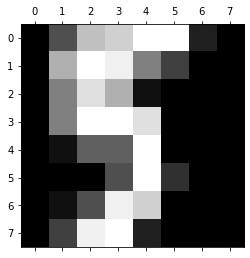

In [39]:
digits = datasets.load_digits()
plt.gray()
plt.matshow(digits.images[15])
plt.show()

In [13]:
datasets.load_digits?

In [19]:
df =pd.DataFrame(digits.data, columns = digits.feature_names)
df['digit'] = digits.target
df['digit'] = df['digit'].apply(lambda x: digits.target_names[x])
df[50:60]

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,digit
50,0.0,0.0,0.0,5.0,14.0,12.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,12.0,13.0,3.0,0.0,2
51,0.0,0.0,0.0,3.0,15.0,10.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,4.0,9.0,14.0,7.0,0.0,2
52,0.0,0.0,3.0,12.0,16.0,16.0,6.0,0.0,0.0,0.0,...,0.0,0.0,0.0,4.0,16.0,5.0,0.0,0.0,0.0,7
53,0.0,0.0,4.0,8.0,16.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,12.0,1.0,0.0,0.0,8
54,0.0,0.0,0.0,1.0,14.0,14.0,3.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,13.0,16.0,5.0,0.0,2
55,0.0,0.0,2.0,14.0,15.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,11.0,13.0,4.0,0.0,0.0,0
56,0.0,0.0,0.0,0.0,12.0,13.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,12.0,12.0,0.0,0.0,1
57,0.0,0.0,0.0,1.0,9.0,11.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,9.0,13.0,3.0,0.0,2
58,0.0,0.0,0.0,10.0,13.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,7.0,15.0,15.0,5.0,0.0,6
59,0.0,1.0,10.0,15.0,11.0,1.0,0.0,0.0,0.0,3.0,...,0.0,0.0,0.0,13.0,16.0,15.0,10.0,0.0,0.0,3


In [20]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size = 0.3)

In [42]:
X_train.shape

(1257, 64)

In [36]:
model = svm.SVC(kernel = 'linear', C=1, gamma='auto')
model.fit(X_train, y_train)
model.score(X_test,y_test)

0.9740740740740741

In [25]:
from sklearn.model_selection import cross_val_score
cross_val_score(svm.SVC(kernel ='rbf', C=10, gamma = 'auto'), digits.data, digits.target, cv=5)

array([0.45277778, 0.46944444, 0.47910864, 0.47910864, 0.50139276])

In [27]:
from sklearn.model_selection import GridSearchCV

clf = GridSearchCV(svm.SVC(gamma='auto'), {
    'C': [1,10,100],
    'kernel': ['linear','rbf']
}, cv =5, return_train_score =False)

clf.fit(digits.data, digits.target)
clf.cv_results_

{'mean_fit_time': array([0.03425255, 0.38370905, 0.04061527, 0.37932758, 0.03436499,
        0.37541728]),
 'std_fit_time': array([0.0157851 , 0.00561011, 0.01249692, 0.01469353, 0.00625012,
        0.00992447]),
 'mean_score_time': array([0.01116552, 0.04136977, 0.00624876, 0.04086413, 0.0062501 ,
        0.04061646]),
 'std_score_time': array([0.00614969, 0.00683469, 0.00765314, 0.0078798 , 0.00765477,
        0.0076507 ]),
 'param_C': masked_array(data=[1, 1, 10, 10, 100, 100],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_kernel': masked_array(data=['linear', 'rbf', 'linear', 'rbf', 'linear', 'rbf'],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 1, 'kernel': 'linear'},
  {'C': 1, 'kernel': 'rbf'},
  {'C': 10, 'kernel': 'linear'},
  {'C': 10, 'kernel': 'rbf'},
  {'C': 100, 'kernel': 'linear'},
  {'C': 100, 'kernel': 'rbf'

In [33]:
db = pd.DataFrame(clf.cv_results_)
db

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.034253,0.015785,0.011166,0.006150,1,linear,"{'C': 1, 'kernel': 'linear'}",0.963889,0.919444,0.966574,0.963788,0.924791,0.947697,0.020978,1
1,0.383709,0.005610,0.041370,0.006835,1,rbf,"{'C': 1, 'kernel': 'rbf'}",0.411111,0.450000,0.454039,0.448468,0.479109,0.448545,0.021761,6
2,0.040615,0.012497,0.006249,0.007653,10,linear,"{'C': 10, 'kernel': 'linear'}",0.963889,0.919444,0.966574,0.963788,0.924791,0.947697,0.020978,1
3,0.379328,0.014694,0.040864,0.007880,10,rbf,"{'C': 10, 'kernel': 'rbf'}",0.452778,0.469444,0.479109,0.479109,0.501393,0.476366,0.015784,4
4,0.034365,0.006250,0.006250,0.007655,100,linear,"{'C': 100, 'kernel': 'linear'}",0.963889,0.919444,0.966574,0.963788,0.924791,0.947697,0.020978,1
5,0.375417,0.009924,0.040616,0.007651,100,rbf,"{'C': 100, 'kernel': 'rbf'}",0.452778,0.469444,0.479109,0.479109,0.501393,0.476366,0.015784,4


In [34]:
clf.best_score_

0.9476973073351903

In [35]:
clf.best_params_

{'C': 1, 'kernel': 'linear'}